# Response to MS paper

* After refitting MS with full mass range, and 
* redefining cut between normal and low SFR using where two gaussians overlap
* expanding cluster sample to not be restricted to where the mips scans were
* change B/T cut from 0.4 to 0.3

## Difference between this notebook and MSpaper_final
* not sure...
* it seems like final is slightly newer and maybe just has the figures for the paper, whereas this notebook has some additional figures that we generated for the referee report.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
homedir = os.getenv("HOME")


from scipy.stats import binned_statistic

In [5]:
# MS fit for all full sample
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.5 

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag


In [12]:
wiseagn = b.lcs.cat['W1MAG_3']-b.lcs.cat['W2MAG_3'] > 0.8

In [17]:
nlcs = np.sum(b.lcs_mass_sfr_flag)
nlcs_wise_agn = np.sum(b.lcs_mass_sfr_flag & wiseagn)
print(nlcs_wise_agn,nlcs)
print(nlcs_wise_agn/nlcs*100)

1 497
0.2012072434607646


In [5]:
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --minssfr -11.5 --cutBT --BT 0.3

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
fitting MS with parabola
MS fit =  Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
             c0                 c1                  c2         
    ------------------- ------------------ --------------------
    -6.8558437735338265 0.8292430229274349 -0.01587975245821294
STD of pruned data = 0.15
STD of full da

# Compare fit to SF peak vs polynomial fit to raw data

In [6]:
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --minssfr -11.5 

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.37
Best-fit inter = -3.92
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.37+/-0.06
Best-fit inter = -3.92+/-0.55
fitting MS with parabola
MS fit =  Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
             c0                 c1                 c2         
    ------------------- ----------------- --------------------
    -23.516194502426337 4.352266614371898 -0.20201847187521382
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPI

Text(0.5, 0, 'logMstar')

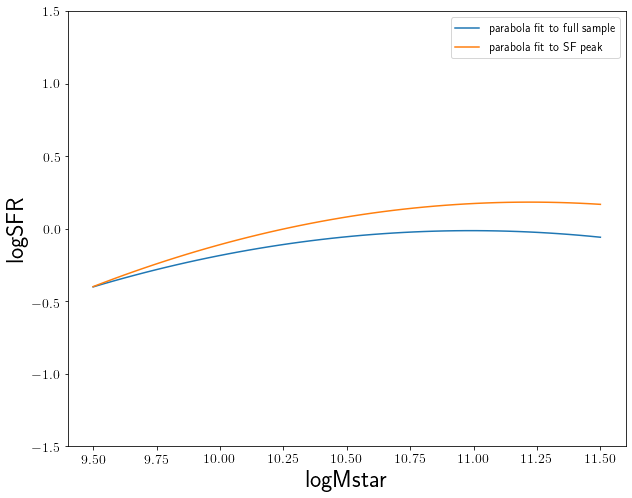

In [13]:
logm = np.linspace(9.5,11.5,50)
plt.figure(figsize=(10,8))
plt.plot(logm,get_MS(logm),label='parabola fit to full sample')
plt.plot(logm,get_MS_SFpeak(logm),label='parabola fit to SF peak')
plt.ylim(-1.5,1.5)
plt.legend()
plt.ylabel('logSFR')
plt.xlabel('logMstar')

# Figure 1: SF Main sequence with full sample

to show division between SF and passive galaxies

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759


<Figure size 489.6x360 with 0 Axes>

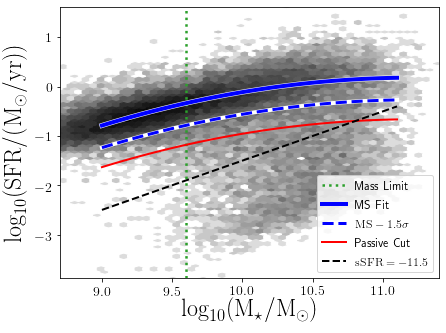

In [23]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.6 --ellip 0.75 --HIdef --minssfr -11.5
b.plot_full_ms()
#xline = np.linspace(8,11,100)
#yline = 0.61*xline-6.20
#plt.plot(xline,yline)

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag


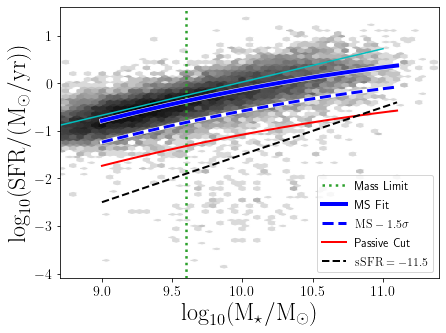

In [25]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.6 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
b.plot_full_ms()

# MS fit from Paccagnella+2016
xline = np.linspace(8,11,100)
yline = 0.7*(xline+.24)-6.9 - .24
plt.plot(xline,yline,'c-')

# Statistics

DONE - NEED TO REDO WITH MASS MATCHING ONLY

In [47]:
# write the tables that will be used to make the latex table

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5
b.ks_stats(massmatch=True)

print()
print()
print('##### WITH BT CUT #####')
print()
print()

%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5 --cutBT --BT 0.3
b.ks_stats(massmatch=True)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759


##### WITH BT CUT #####


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305


<Figure size 489.6x360 with 0 Axes>

In [25]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
number of core galaxies =  137
	 with size measurements =  --
number of infall galaxies =  360
	 with size measurements =  --
number of GSW galaxies =  11111

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
number of core galaxies =  86
	 with size measurements =  --
number of infall galaxies =  216
	 with size measurements =  --
number of GSW galaxies =  7590


### Number with HI detections

In [26]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
number of core galaxies =  22
number of infall galaxies =  94
number of GSW galaxies =  3172

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
number of core galaxies =  18
number of infall galaxies =  68
number of GSW galaxies =  2404


# Table 1

In [11]:
%%time
# run program to update statistics tables
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5

b.ks_stats(massmatch=True)

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats-massmatch.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
########################################
LCS Core vs Field: SFR
	D = 1.98e-01, pvalue = 3.38e-05
	AD D = 1.59e+01, pvalue = 1.00e-03

LCS Core vs Field: dSFR
	D = 2.21e-01, pvalue = 2.31e-06
	AD D = 1.66e+01, pvalue = 1.00e-03

LCS Core vs Field: Mstar
	D = 6.41e-02, pvalue = 6.04e-01
	AD D = -4.33e-01, pvalue = 2.50e-01

LCS Core vs Field: BT
	D = 1.52e-01, pvalue = 2.97e-03
	AD D = 7.28e+00, pvalue = 1.00e-03
########################################
LCS Infall vs Field: SFR
	D = 1.91e-01, pvalue = 6.41e-12
	AD D = 3.46e+01, pvalue = 1.00e-03

LCS Infall vs Field: dSFR
	D = 1.94e-01, pvalue = 2.92e-12
	AD D = 3.44e+01, pvalue = 1.00e-03

LCS Infall vs Field: Mstar
	D = 2.92e-02, pvalue = 9.13e-01
	AD D = -8.04e-01, pvalue = 2.50e-01

LCS Infall vs Field: BT
	D = 1.37e-01, pvalue = 3.12e-06
	AD D = 1.26e+01, pvalue = 1.00e

In [28]:
%%time
# run program to update statistics tables
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 10 --ellip 0.75 --HIdef --minssfr -11.5

b.ks_stats(massmatch=False)

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 1.95e-01, pvalue = 8.59e-03
Anderson_ksampResult(statistic=5.103375933915006, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0031854230443338384)

LCS Core vs Field: dSFR
	D = 2.10e-01, pvalue = 3.69e-03
Anderson_ksampResult(statistic=6.8793888870802675, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: Mstar
	D = 1.16e-01, pvalue = 2.86e-01
Anderson_ksampResult(statistic=-0.03743914564388882, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

LCS Core vs Field: BT
	D = 1.74e-01, pvalue = 2.67e-02
Anderson_ksampResult(statistic=-0.03743914564388882, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
########################################
LCS Infall vs Field: SFR
	D = 1.45e-01, pvalue = 1.82e-04
Anderson_k

In [29]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats-massmatch.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 2.02e-01, pvalue = 6.82e-03
	AD D = 6.31e+00, pvalue = 1.21e-03

LCS Core vs Field: dSFR
	D = 2.07e-01, pvalue = 5.06e-03
	AD D = 6.79e+00, pvalue = 1.00e-03

LCS Core vs Field: Mstar
	D = 7.33e-02, pvalue = 8.35e-01
	AD D = -9.41e-01, pvalue = 2.50e-01

LCS Core vs Field: BT
	D = 1.54e-01, pvalue = 7.32e-02
	AD D = 2.39e+00, pvalue = 3.39e-02
########################################
LCS Infall vs Field: SFR
	D = 1.43e-01, pvalue = 2.46e-04
	AD D = 1.29e+01, pvalue = 1.00e-03

LCS Infall vs Field: dSFR
	D = 1.55e-01, pvalue = 4.99e-05
	AD D = 1.27e+01, pvalue = 1.00e-03

LCS Infall vs Field: Mstar
	D = 2.70e-02, pvalue = 9.96e-01
	AD D = -9.98e-01, pvalue = 2.50e-01

LCS Infall vs Field: BT
	D = 1.62e-01, pvalue = 1.80e-05
	AD D = 1.00e+01, pvalue = 1.00e-03

########################################
LCS Core vs Infall: SFR
	D = 8.00e-02, pvalue = 8.52e-01
	AD D = -8.14e-01, pvalue = 2.50e-01
LCS Core vs Infall: dSFR
	

#  Figure 2 - SFR vs Mstar

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
number in lcs sample =  137
number in gsw sample =  11111
just checking ... 11110 137
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 5.926e-02 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=1.6896395141517524, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.06526128383414989)

COLOR
KS Test:
D =   0.21
p-vale = 1.233e-05 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=16.946575552370316, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


number in lcs sample =  360
number in gsw samp

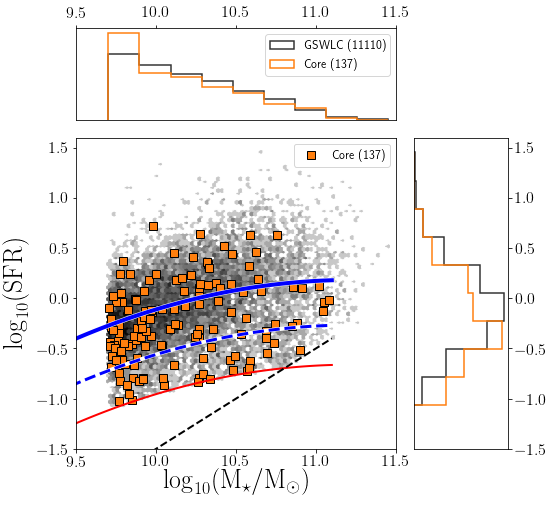

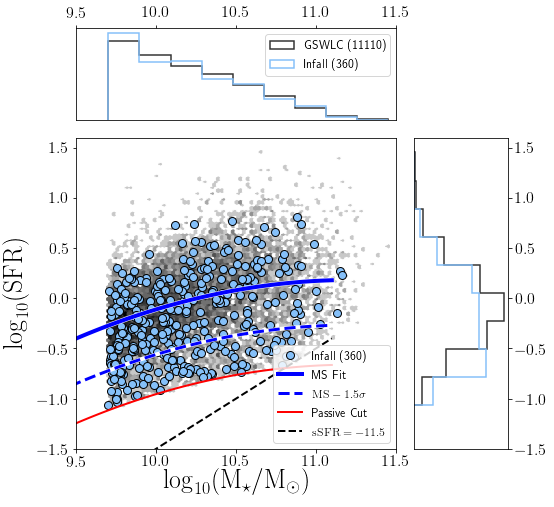

In [30]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5

mmatch = False
if mmatch:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=True,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)
else:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)
    

In [29]:
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5
print(sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print(sum(b.gsw_mass_sfr_flag))

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
137
11111


In [30]:
b.write_tables_for_SFR_sim()

## With BT cut

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
number in lcs sample =  86
number in gsw sample =  7590
just checking ... 7590 86
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.14
p-vale = 5.833e-02 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=1.8601488314847003, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.05556212350695588)

COLOR
KS Test:
D =   0.26
p-vale = 1.872e-05 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=11.975900399534396, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), signifi

<Figure size 489.6x360 with 0 Axes>

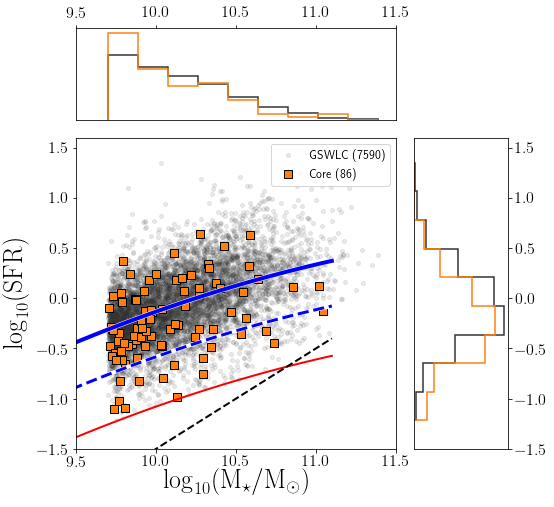

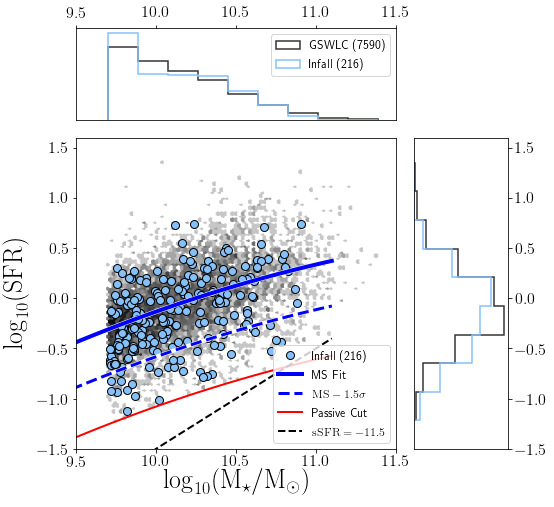

In [31]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5 --cutBT --BT 0.3
mmatch=False

if mmatch:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)
else:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=False,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)


# Figure 3 - dSFR hist

# To do 

1. [DONE] potentially refitting the main sequence; (Rose)
  * before: everything above mass and sSFR limit
  * try fitting to everything, with salim sSFR cut to get a relationship closer to
  $$ logSFR = 0.6(logMstar-11) - 0.57 $$
  this is what we eyeballed from topcat.
1. [DONE] using our double Gaussian fits to set up a boundary that is parallel to the MS, and offset based on the point where the two Gaussian fits cross.  this is not where the min is of the joint profile.  Need to plot each gaussian individually, then find where they cross (equal contribution from both populations), then fit a lit to these points vs logMstar; (Rose)
1. describing this process in the paper; (Greg and Benedetta)
1. Once we refit the main sequence, we need to recalculate the suppressed fractions and delta_sfr, and update the corresponding 
 1. plots and 
 2. numbers in the text.  (Rose)
1. implement mass matching throughout.  use Nfield/N_LCS to pick how many galaxies we select from field sample for mass matching. (Rose)
1. updating numbers in the paper accordingly; (Rose)
1. hopefully not having to update any of our conclusions:-) (Greg and Benedetta)
1. need to update for no BT cut and BT< 0.3 cut, and propagate. (Rose)
1. read through overleaf, and update discussion as necessary. (Greg and Benedetta)


# Summary 

This notebook shows the results if we use:

* MS fit by fitting peak of gaussian of SF population vs stellar mass.  We use the full GSWLC, with only a redshift cut applied to match the redshift range of LCS.  
* The details iare in the notebook fittingMainSequence
* This gives roughly
  * $ (0.56 +/- 0.01)*logMstar - (5.74+/- 0.12)$
  * the std of those gaussians is about 0.23.
  * both of these numbers depend somewhat on the exact mass range you use.  The SF peak is best defined with lower mass galaxies (like $logMstar < 10$), whereas the double peak is best defined with.
  * For example, if we fit using $9 < logMstar < 10.4$, we get a 
    * $ 0.61*logMstar - 6.20$
  * But we then need to use a different mass range to get the offset from the MS.
  * Problem is that the offset is approximately 2sigma from the center, so there is not much room between e.g. 1.5 sigma and 2 sigma - very narrow slice to define as suppressed galaxy.
* STD of main sequence varies with mass, probably because it's not actually linear.  It ranges from 0.2 at lower masses to 0.3 at higher masses.

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag

Field: median = -0.0358-0.0038+0.0056 (bootstrap)
Field: mean, std, std_err = -0.0407,0.3424,0.0028 


Core: median = -0.1949-0.0261+0.0669 (bootstrap)
Core: mean, std, std_err = -0.1758,0.3780,0.0323 


Infall: median = -0.1469-0.0326+0.0345 (bootstrap)
Infall: mean, std, std_err = -0.1553,0.3780,0.0199 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.20629861896439466, pvalue=1.917546791070408e-05)
Anderson_ksampResult(statistic=13.47008766405865, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.18087972278113124, pvalue=2.0498737287208066e-10)
Anderson_ksampResult(statistic=27.728971012559843, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATIST

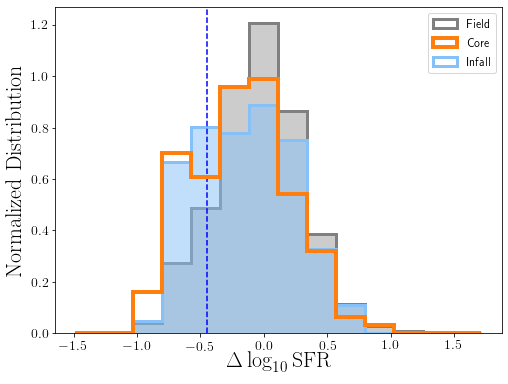

In [46]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.5
mmatch = True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True,nbins=15)
else:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=False,nbins=15)

# Figure 4 - Frac Suppressed vs environment

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
CORE
frac suppressed = 0.226, -0.034,0.038
INFALL
0.25277777777777777 [-0.02219937  0.02356903]
FIELD
0.1255533199195171 [-0.00268849  0.00273872]
(2,)

#####  WITH BT CUT  ######

CORE
frac suppressed = 0.110, -0.030,0.039
INFALL
0.11961722488038277 [-0.02065536  0.02427806]
FIELD
0.05050301810865191 [-0.00176341  0.0018237 ]
(2,)


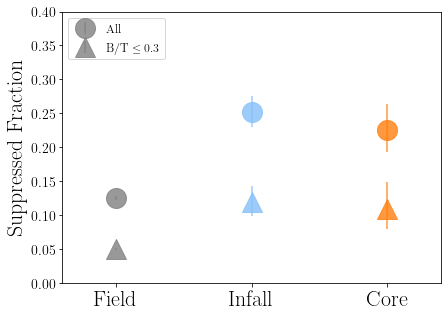

In [4]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.5
mmatch=True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.png'
    b.plot_frac_suppressed(massmatch=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    print()
    print('#####  WITH BT CUT  ######')
    print()
    btcut = 0.3
    b.plot_frac_suppressed(BTcut=btcut,plotsingle=False,massmatch=True)
    
else:
    outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1.pdf'
    outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1.png'
    b.plot_frac_suppressed(massmatch=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    print()
    print('#####  WITH BT CUT  ######')
    print()
    btcut = 0.3
    b.plot_frac_suppressed(BTcut=btcut,plotsingle=False,massmatch=False)
plt.ylim(0,.4)
plt.legend([r'$\rm All$','_nolegend_','_nolegend_',r'$\rm B/T \le 0.3$'],loc='upper left')
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 5

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
COMPARING PROPERTIES OF NORMAL AND LOW GALAXIES
	 field, core, infall
	 BT
	 field, core, infall
	 logMstar
KS results:  Ks_2sampResult(statistic=0.40661275045537343, pvalue=0.0)
AD results:  Anderson_ksampResult(statistic=1417.7276261079282, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS results:  Ks_2sampResult(statistic=0.5264759586122946, pvalue=1.1616871794517536e-06)
AD results:  Anderson_ksampResult(statistic=13.772001783154078, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS results:  Ks_2sampResult(statistic=0.40977981126680013, pvalue=8.656331207390622e-11)
AD results:  Anderson_ksampResult(statistic=29.17755105662489, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significanc

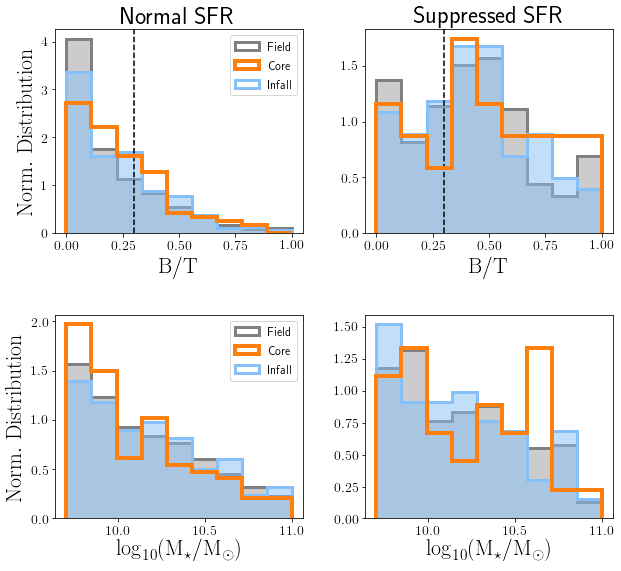

In [45]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.5
mmatch=True
if mmatch:
    b.compare_morph_mmatch(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75-mmatch.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)
else:
    b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)

# Figure 5

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
#######################################
comparing low SFR and mass-matched normal SFR
KstestResult(statistic=0.40399999999999997, pvalue=1.0041752062806185e-196)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
KstestResult(statistic=0.04468310550036109, pvalue=4.188442090558143e-14)
CPU times: user 52.2 s, sys: 455 ms, total: 52.6 s
Wall time: 52.8 s


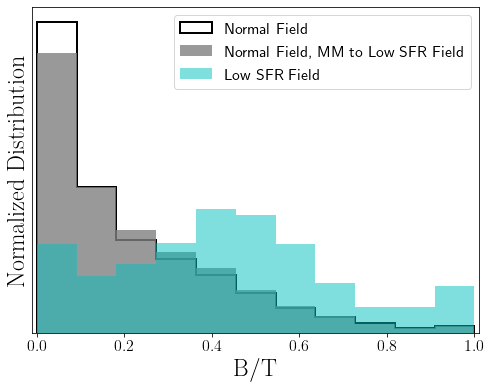

In [5]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --minssfr -11.5

b.compare_BT_lowsfr_field(nbins=12,BTmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 7

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759

Field
r=nan, pvalue=nan

Core
r=-0.2670, pvalue=1.613e-03

Infall
r=nan, pvalue=nan

 Combined Samples: Spearman Rank
CPU times: user 25.3 s, sys: 66.7 ms, total: 25.4 s
Wall time: 23.3 s


<Figure size 489.6x360 with 0 Axes>

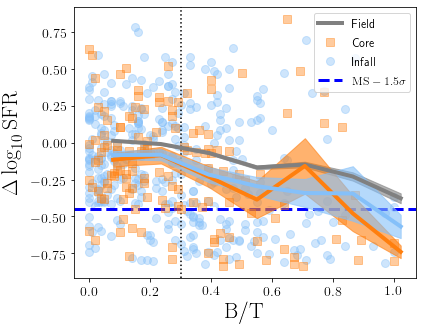

In [36]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.5

mmatch = True
if mmatch:
    xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.3,mmatch=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75-mmatch.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)
else:
    xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.3,mmatch=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)

# Figure 8

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag

Field: median = 0.0036-0.0036+0.0050 (bootstrap)
Field: mean, std, std_err = 0.0040,0.3103,0.0044 


Core: median = -0.1894-0.0368+0.1910 (bootstrap)
Core: mean, std, std_err = -0.1460,0.3759,0.0587 


Infall: median = -0.0358-0.0590+0.0378 (bootstrap)
Infall: mean, std, std_err = -0.0839,0.3509,0.0313 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.2623338688476705, pvalue=0.005856172862379494)
Anderson_ksampResult(statistic=5.86374875175802, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0017223899367836719)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.13390362132877104, pvalue=0.02203395762441618)
Anderson_ksampResult(statistic=5.103421805876147, critical_values=array([0.325, 1.2

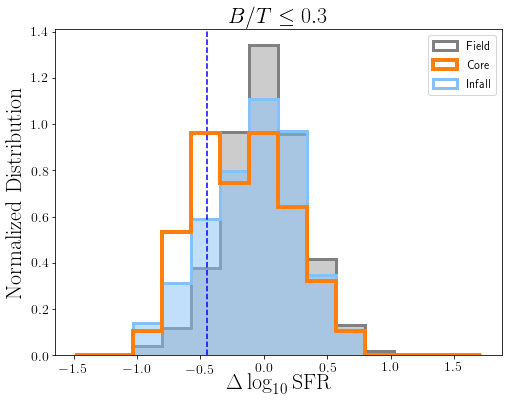

In [44]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .3 --minmass 10 --ellip 0.75 --minssfr -11.5
mmatch=True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)
else:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=False)
    

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag

Field: median = 0.0036-0.0036+0.0050 (bootstrap)
Field: mean, std, std_err = 0.0040,0.3103,0.0044 


Core: median = -0.1894-0.0368+0.1910 (bootstrap)
Core: mean, std, std_err = -0.1460,0.3759,0.0587 


Infall: median = -0.0358-0.0590+0.0378 (bootstrap)
Infall: mean, std, std_err = -0.0839,0.3509,0.0313 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.2623338688476705, pvalue=0.005856172862379494)
Anderson_ksampResult(statistic=5.86374875175802, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0017223899367836719)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.13390362132877104, pvalue=0.02203395762441618)
Anderson_ksampResult(statistic=5.103421805876147, critical_values=array([0.325, 1.2

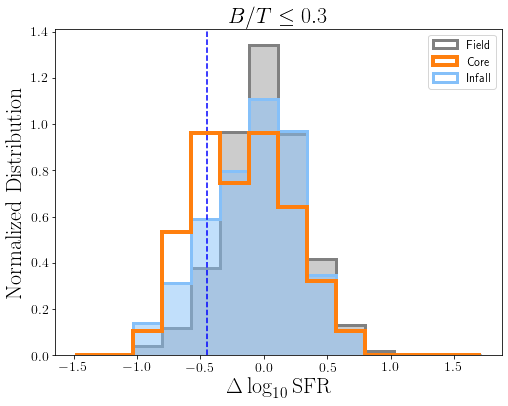

In [42]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .3 --minmass 10 --ellip 0.75 --minssfr -11.5
mmatch=True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)
else:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=False)
    
    
print()
print('number of core galaxies = ',np.sum(b.lcs.membflag & b.lcs_mass_sfr_flag))
print('number of infall galaxies = ',np.sum(b.lcs.infallflag & b.lcs_mass_sfr_flag))

# Figure 9

In [42]:
%%time
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.5 
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)

# mass matching built in

b.compare_BT_lowsfr_lcs_field_mmatch(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)

b.compare_BT_lowsfr_lcs_field_mmatch(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)


outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.png'
    
plt.savefig(outfile1)
plt.savefig(outfile2)



outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag

TESTING



TypeError: compare_BT_lowsfr_lcs_field_mmatch() got an unexpected keyword argument 'nrow'

<Figure size 864x432 with 0 Axes>

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag

TESTING



###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$

median LCS 0.19 vs field 0.18

statistic=0.11, pvalue=8.28e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.3519689544799571, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)


###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm S{e}rsic \ n$

median LCS 1.43 vs field 1.37

statistic=0.13, pvalue=6.76e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.30835680361795254, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)


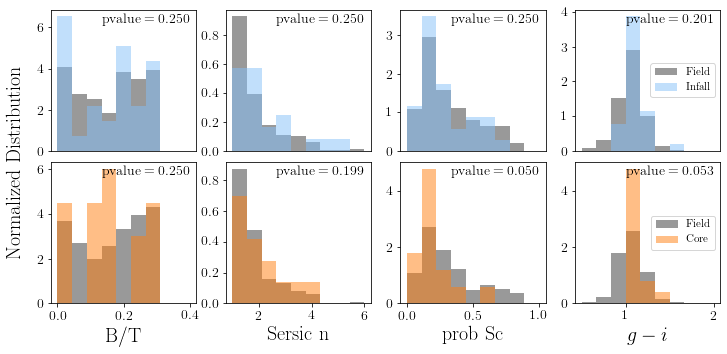

In [27]:
%%time
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.5 
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.2,bottom=.2,hspace=.08)

# mass matching built in

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)


outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.png'
    
plt.savefig(outfile1)
plt.savefig(outfile2)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag

TESTING



###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$

median LCS 0.41 vs field nan

statistic=0.08, pvalue=5.22e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.5123466369566244, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)


###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm S{e}rsic \ n$

median LCS 2.60 vs field 2.59

statistic=0.11, pvalue=2.56e-01

anderson-darling test
Anderson_ksampResult(statistic=0.42792171171478666, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.2218220185821882)


#########################################################

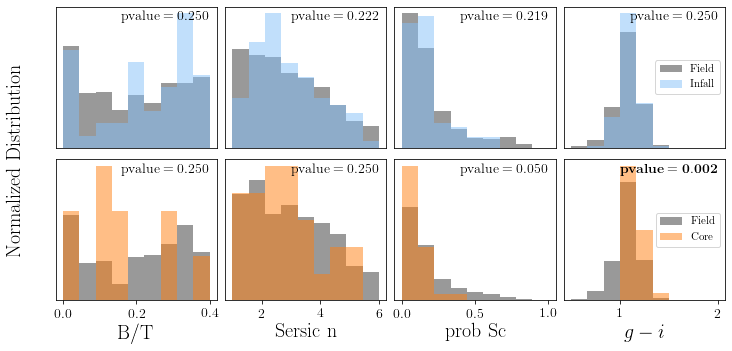

In [23]:
# trying to address the referee's comment regarding properties of suppressed galaxies
# the comment is that we already restrict the population to disk dominated galaxies, so 
# so we have reduced our ability to discriminate, or something like that.
# running this without the B/T cut - maybe it's more informative this way?

# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --minssfr -11.5 
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.05,bottom=.2,hspace=.08)

# mass matching built in

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)


outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut1-e0p75.png'
    
plt.savefig(outfile1)
plt.savefig(outfile2)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
galaxies in slice < # requested 14 30 11.044
###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$
statistic=0.08, pvalue=9.43e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.7258552614926209, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm S{e}rsic \ n$
statistic=0.70, pvalue=3.88e-19

anderson-darling test
Anderson_ksampResult(statistic=1012.7608665456859, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
##############

<Figure size 489.6x360 with 0 Axes>

<Figure size 864x288 with 0 Axes>

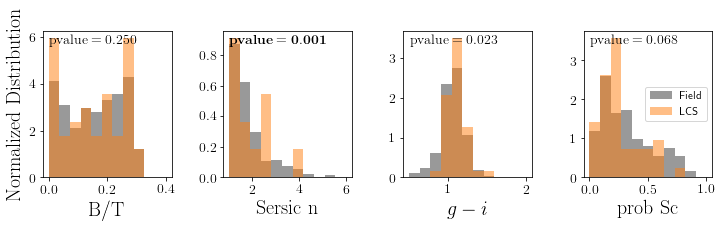

In [42]:
%%time
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.5 
# use full sample of LCS (not split by core/infall)

plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)
b.compare_BT_lowsfr_field_core(nbins=12,coreonly=False,infallonly=False,BTmax=btmax,plotsingle=True,nrow=1,show_xlabel=True)
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)


outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p3-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


# looking at radial trends

In [38]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef 

outfile =  /Users/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag


In [3]:
fallgals =  (b.gsw.cat['logMstar'] > 9.7)

# mass match field to cluster
mass2match = b.lcs.cat['logMstar'][(b.lcs.membflag | b.lcs.infallflag) & (b.lcs.cat['logMstar'] > 9.7)]
nmassmatch=30
keep_indices = mass_match(mass2match,b.gsw.cat['logMstar'][fallgals],3299,nmatch=NMASSMATCH) 

gswmmcat=b.gsw.cat[fallgals][keep_indices]

In [39]:
gswmmcat=b.gsw.cat[fallgals]

number in double cluster = 468 2291


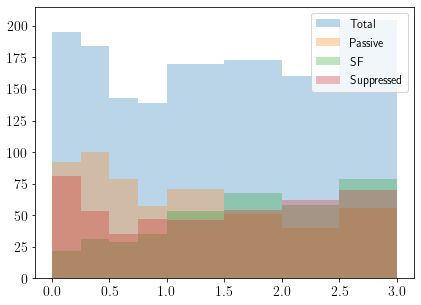

In [40]:
dcluster_flag = (b.lcs.cat['CLUSTER_1'] == '{:12s}'.format('A2052')) | (b.lcs.cat['CLUSTER_1'] == '{:12s}'.format('A2063'))
print('number in double cluster = {}'.format(np.sum(dcluster_flag)),np.sum(~dcluster_flag))
allflag = (b.lcs.cat['DELTA_V'] < 3.)
dsfr = b.lcs.cat['logSFR'] - get_MS(b.lcs.cat['logMstar'])
allgals = (b.lcs.membflag | b.lcs.infallflag) & (b.lcs.cat['logMstar'] > 9.7) #& ~dcluster_flag
lcs_ssfr = b.lcs.cat['logSFR'] - b.lcs.cat['logMstar']
passive = allgals & (lcs_ssfr < -12) #(b.lcs.cat['logSFR'] <  get_SFR_cut(b.lcs.cat['logMstar']))
suppressed = allgals & (dsfr <= -0.45) & (lcs_ssfr > -12) #(b.lcs.cat['logSFR'] >  get_SFR_cut(b.lcs.cat['logMstar'])) 
sf = allgals  & (dsfr > -0.45) & (lcs_ssfr > -12) #& (b.lcs.cat['logSFR'] >  get_SFR_cut(b.lcs.cat['logMstar']))   


# get fractions
NBINS = 7
mybins = np.linspace(0,3,NBINS)
mybins = np.array([0,.25,.5,0.75,1,1.5,2,2.5,3])

ntot,bin_edges,binnumber = plt.hist(b.lcs.cat['DR_R200'][allgals],bins=mybins,label='Total',alpha=.3)

npassive,bin_edges,binnumber = plt.hist(b.lcs.cat['DR_R200'][passive],bins=mybins,label='Passive',alpha=.3)
nsf,bin_edges,binnumber = plt.hist(b.lcs.cat['DR_R200'][sf],bins=mybins,label='SF',alpha=.3)
nsuppressed,bin_edges,binnumber = plt.hist(b.lcs.cat['DR_R200'][suppressed],bins=mybins,label='Suppressed',alpha=.3)
plt.legend()
                     
 

# Field from galaxies that are behind clusters

cluster_field = (b.lcs.cat['DELTA_V'] > 3.) & (b.lcs.cat['logMstar'] > 9.7)
cfpassive = cluster_field & (b.lcs.cat['logSFR'] <  get_SFR_cut(b.lcs.cat['logMstar']))
cfsf = cluster_field & (b.lcs.cat['logSFR'] <  get_SFR_cut(b.lcs.cat['logMstar']))
cfsuppressed = cluster_field & (b.lcs.cat['logSFR'] >  get_SFR_cut(b.lcs.cat['logMstar'])) & (dsfr <= -0.45)
cfntot = np.sum(cluster_field)

#cffrac_passive,cffrac_passive_err = ratio_error(np.sum(cfpassive),cfntot)
#cffrac_suppressed,cffrac_suppressed_err = ratio_error(np.sum(cfsuppressed),cfntot)
#cffrac_suppressed_sf,cffrac_suppressed_sf_err = ratio_error(np.sum(cfsuppressed),np.sum(cfsf))
#cffrac_sf,cffrac_sf_err = ratio_error(np.sum(cfsf),cfntot)
# FIELD VALUES



gswmmcat_ssfr = gswmmcat['logSFR'] - gswmmcat['logMstar']
fdsfr = gswmmcat['logSFR'] - get_MS(gswmmcat['logMstar'])
fpassive =  gswmmcat_ssfr < -12 #(gswmmcat['logSFR'] <  get_SFR_cut(gswmmcat['logMstar']))
fsuppressed =   (fdsfr <= -0.45) & (gswmmcat_ssfr > -12)#& (gswmmcat['logSFR'] >  get_SFR_cut(gswmmcat['logMstar'])) &
fsf =  (fdsfr > -0.45) & (gswmmcat_ssfr > -12) #(gswmmcat['logSFR'] >  get_SFR_cut(gswmmcat['logMstar'])) 
fntot = len(gswmmcat)
# CALCULATE RATIOS FOR FIELD
ffrac_passive,ffrac_passive_err = ratio_error(np.sum(fpassive),fntot)
ffrac_suppressed,ffrac_suppressed_err = ratio_error(np.sum(fsuppressed),fntot)
ffrac_suppressed_sf,ffrac_suppressed_sf_err = ratio_error(np.sum(fsuppressed),np.sum(fsf))
ffrac_sf,ffrac_sf_err = ratio_error(np.sum(fsf),fntot)



ValueError: k must be in {0, 1, .., n}

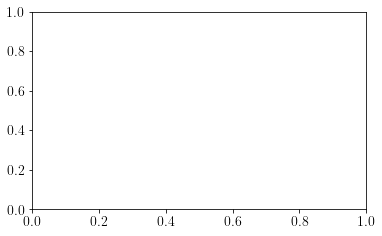

In [36]:
plt.figure(figsize=(6,8))
plt.subplot(2,1,1)

ratio,yerr = ratio_error(nsuppressed,nsf)
plt.errorbar(mybins[1:],ratio,yerr=yerr,fmt='^-',label='Suppressed/SF',c='k')
upper = np.ones(len(mybins[1:]))*(ffrac_suppressed_sf+ffrac_suppressed_sf_err[1])
lower = np.ones(len(mybins[1:]))*(ffrac_suppressed_sf-ffrac_suppressed_sf_err[1])
plt.fill_between(mybins[1:],upper,lower,color='k',alpha=.5,label='Field')

plt.ylabel('$N_{Suppressed}/N_{SF}$',fontsize=22)
plt.ylim(0,1)

plt.legend()

plt.subplot(2,1,2)
ratio,yerr = ratio_error(npassive,ntot)
plt.errorbar(mybins[1:],ratio,yerr=yerr,fmt='o-',label='Passive',c=mycolors[0])
upper = np.ones(len(mybins[1:]))*(ffrac_passive+ffrac_passive_err[1])
lower = np.ones(len(mybins[1:]))*(ffrac_passive-ffrac_passive_err[1])
plt.fill_between(mybins[1:],upper,lower,color=mycolors[0],alpha=.5)

# upper = np.ones(len(mybins[1:]))*(cffrac_passive+cffrac_passive_err[1])
# lower = np.ones(len(mybins[1:]))*(cffrac_passive-cffrac_passive_err[1])
# plt.fill_between(mybins[1:],upper,lower,color=mycolors[0],alpha=.1)


ratio,yerr = ratio_error(nsuppressed,ntot)
plt.errorbar(mybins[1:],nsuppressed/ntot,yerr=yerr,fmt='^-',label='Suppressed',c=mycolors[1])
upper = np.ones(len(mybins[1:]))*(ffrac_suppressed+ffrac_suppressed_err[1])
lower = np.ones(len(mybins[1:]))*(ffrac_suppressed-ffrac_suppressed_err[1])
plt.fill_between(mybins[1:],upper,lower,color=mycolors[1],alpha=.5)

# upper = np.ones(len(mybins[1:]))*(cffrac_suppressed+cffrac_suppressed_err[1])
# lower = np.ones(len(mybins[1:]))*(cffrac_suppressed-cffrac_suppressed_err[1])
# plt.fill_between(mybins[1:],upper,lower,color=mycolors[1],alpha=.1)


ratio,yerr = ratio_error(nsf,ntot)
plt.errorbar(mybins[1:],ratio,yerr=yerr,fmt='*-',label='SF',c=mycolors[2],markersize=12)
upper = np.ones(len(mybins[1:]))*(ffrac_sf+ffrac_sf_err[1])
lower = np.ones(len(mybins[1:]))*(ffrac_sf-ffrac_sf_err[1])
plt.fill_between(mybins[1:],upper,lower,color=mycolors[2],alpha=.5)


# upper = np.ones(len(mybins[1:]))*(cffrac_sf+cffrac_sf_err[1])
# lower = np.ones(len(mybins[1:]))*(cffrac_sf-cffrac_sf_err[1])
# plt.fill_between(mybins[1:],upper,lower,color=mycolors[2],alpha=.1)


plt.legend()
plt.xlabel('$\Delta R/R_{200}$',fontsize=22)
plt.ylabel('$Fraction \ N/N_{total}$',fontsize=22)
plt.ylim(0,1)


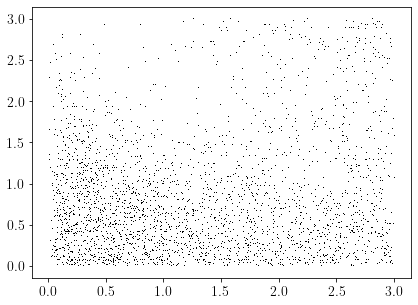

In [23]:
plt.figure()
x = b.lcs.cat['DR_R200']
y= b.lcs.cat['DV_SIGMA']
plt.plot(x,y,'k,')

Text(0, 0.5, '$Fraction$')

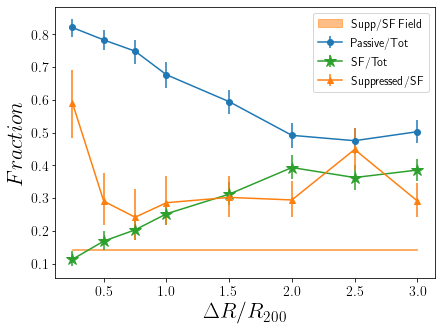

In [13]:
plt.figure()
ratio,yerr = ratio_error(npassive,ntot)
plt.errorbar(mybins[1:],ratio,yerr=yerr,fmt='o-',label='Passive/Tot',c=mycolors[0])
upper = np.ones(len(mybins[1:]))*(ffrac_passive+ffrac_passive_err[1])
lower = np.ones(len(mybins[1:]))*(ffrac_passive-ffrac_passive_err[1])
#plt.fill_between(mybins[1:],upper,lower,color=mycolors[0],alpha=.5)



ratio,yerr = ratio_error(nsf,ntot)
plt.errorbar(mybins[1:],ratio,yerr=yerr,fmt='*-',label='SF/Tot',c=mycolors[2],markersize=12)
upper = np.ones(len(mybins[1:]))*(ffrac_sf+ffrac_sf_err[1])
lower = np.ones(len(mybins[1:]))*(ffrac_sf-ffrac_sf_err[1])
#plt.fill_between(mybins[1:],upper,lower,color=mycolors[2],alpha=.5)



ratio,yerr = ratio_error(nsuppressed,nsf)
plt.errorbar(mybins[1:],ratio,yerr=yerr,fmt='^-',label='Suppressed/SF',c=mycolors[1])
upper = np.ones(len(mybins[1:]))*(ffrac_suppressed_sf+ffrac_suppressed_sf_err[1])
lower = np.ones(len(mybins[1:]))*(ffrac_suppressed_sf-ffrac_suppressed_sf_err[1])
plt.fill_between(mybins[1:],upper,lower,color=mycolors[1],alpha=.5,label='Supp/SF Field')


plt.legend()
plt.xlabel('$\Delta R/R_{200}$',fontsize=22)
plt.ylabel('$Fraction$',fontsize=22)



# Phase Space Diagram without HI

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
number in parent sample =  302
number in low SFR sample =  46
number in normal SFR sample =  256
just checking, number of low sfr sample = 46
just checking, number of normal sfr sample = 256

delta R: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=-0.6132944910610858, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
pvalue = 2.500e-01

delta v/sigma: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=0.27878794293558773, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
pvalue = 2.500e-01
CPU times: user 8.07 s, sys: 218 ms, total: 8.29 s
Wall time: 6.27 s


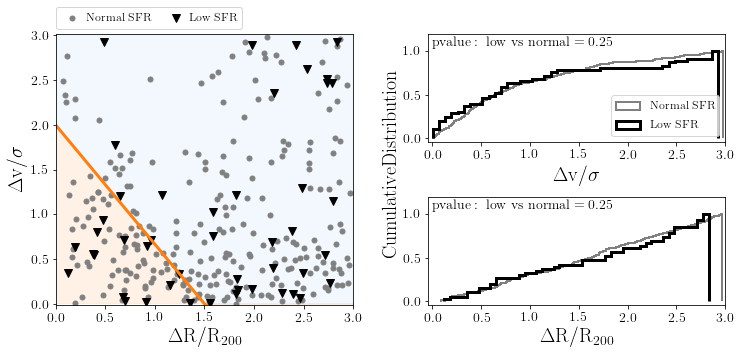

In [39]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .3 --cutBT --ellip .75 --minssfr -11.5
#%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.5
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals-2panel-noHI.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals-2panel-noHI.pdf'
b.plot_dvdr_sfgals_2panel(figname1=figname1,figname2=figname2,HIflag=False)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
number in parent sample =  497
number in low SFR sample =  122
number in normal SFR sample =  375
just checking, number of low sfr sample = 122
just checking, number of normal sfr sample = 375

delta R: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=-0.7650930880219269, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
pvalue = 2.500e-01

delta v/sigma: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=0.22179032196923484, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
pvalue = 2.500e-01
CPU times: user 7.94 s, sys: 185 ms, total: 8.13 s
Wall time: 6.13 s


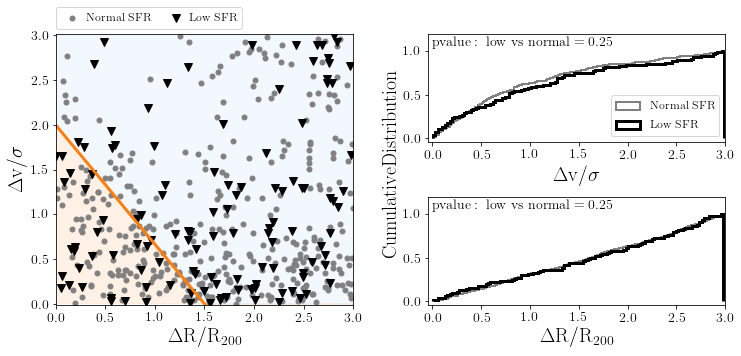

In [38]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --minssfr -11.5
#%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.5
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals-2panel-noHI.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals-2panel-noHI.pdf'
b.plot_dvdr_sfgals_2panel(figname1=figname1,figname2=figname2,HIflag=False)

# Referee Comments

### Checking sersic index vs BT

2022-06-24

* if we were going to use sersic index instead of BT to check behavior of disk-dominated galaxies, we would have to 
  * refit the MS with n < 2 galaxies
  * update main code to cut on sersic index ('ng') instead of BT
  * see how statistics are affected
  
* OR can we just run the statistics instead?
  * I can print out stats table, and run the tests after cutting on sersic N
  
  

In [15]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.6 --ellip 0.75  --minssfr -11.5


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
STD of pruned data = 0.19
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.53
Best-fit inter = -5.49
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.53+/-0.03
Best-fit inter = -5.49+/-0.33
fitting MS with parabola
MS fit =  Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
             c0                 c1                  c2        
    ------------------- ------------------ -------------------
    -119.40738314898012 23.792718104977475 -1.1872640771955898
STD of pruned data = 0.19
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPI

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag

Field
r=-0.1589, pvalue=6.178e-85

Core
r=-0.3125, pvalue=2.009e-04

Infall
r=-0.2300, pvalue=1.048e-05

 Combined Samples: Spearman Rank


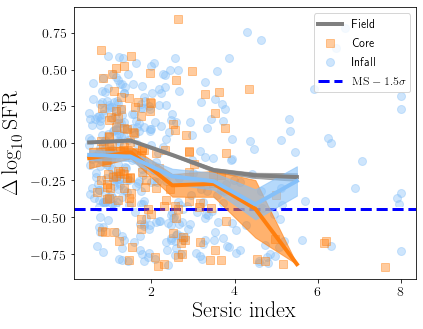

In [24]:
# plot sersic index vs BT

os.chdir(homedir+'/research/LCS/plots/')
btmax=6
nbins=7

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.5

mmatch = True
if mmatch:
    xvars,yvars = b.plot_dsfr_nsersic(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=None,mmatch=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/dsfr-nsersic-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/dsfr-nsersic-e0p75-mmatch.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)
else:
    xvars,yvars = b.plot_dsfr_nsersic(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=None,mmatch=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/dsfr-nsersic-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/dsfr-nsersic-e0p75.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)

fraction of sample with BT < 0.3 = 0.66

fraction of sample with sersic index < 2 = 0.69


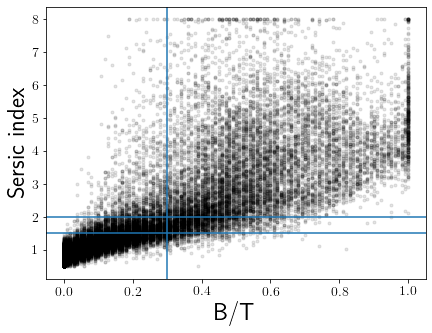

In [33]:
# compare B/T and sersic index

plt.figure()
x = b.gsw.cat[BTkey]
y = b.gsw.cat['ng']
plt.plot(x,y,'k.',alpha=.1)
plt.xlabel('B/T')
plt.ylabel('Sersic index')
plt.axvline(x=.3)
plt.axhline(y=1.5)
plt.axhline(y=2)
print('fraction of sample with BT < 0.3 = {:.2f}'.format(np.sum(x < 0.3)/len(x)))
print()
print('fraction of sample with sersic index < 2 = {:.2f}'.format(np.sum(y < 2)/len(y)))

Field : number of galaxies in normal sf subsample =  9736
2 2 3
Field : number of galaxies in suppressed sf subsample =  1375

Core : number of galaxies in normal sf subsample =  106
2 2 3
Core : number of galaxies in suppressed sf subsample =  31

Infall : number of galaxies in normal sf subsample =  269
2 2 3
Infall : number of galaxies in suppressed sf subsample =  91

Field : number of galaxies in normal sf subsample =  9736
2 2 6
Field : number of galaxies in suppressed sf subsample =  1375

Core : number of galaxies in normal sf subsample =  106
2 2 6
Core : number of galaxies in suppressed sf subsample =  31

Infall : number of galaxies in normal sf subsample =  269
2 2 6
Infall : number of galaxies in suppressed sf subsample =  91

######################################################
comparing mass distribution of normal SFR galaxies, field vs core
Ks_2sampResult(statistic=0.12853870482628177, pvalue=0.057037510883783726)
######################################################

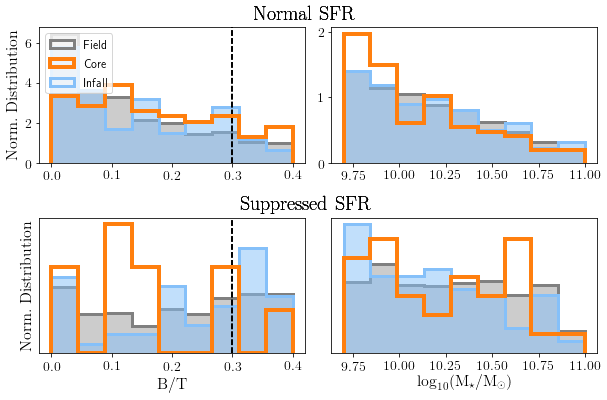

In [34]:
b.compare_morph()

# Cutting catalog based on sersic index rather than BT

- to address potential issues with BT, like problems handling bars
- (DONE) cut catalog on sersic index
- fit SFR-MS with nsersic cut
- remake 
  - Fig 2
  - Fig 4
  - Fig 6
  - Fig 7

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
number in lcs sample =  89
number in gsw sample =  8206
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 5.586e-01 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=-0.5738066088496362, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

COLOR
KS Test:
D =   0.20
p-vale = 1.353e-03 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=7.272274271998999, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


number in lcs sample =  240
number in gsw sample =  8206
############################################################ 
KS t

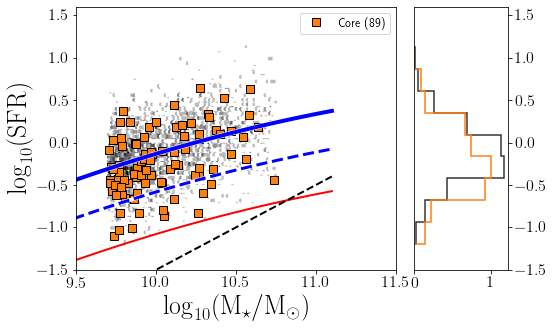

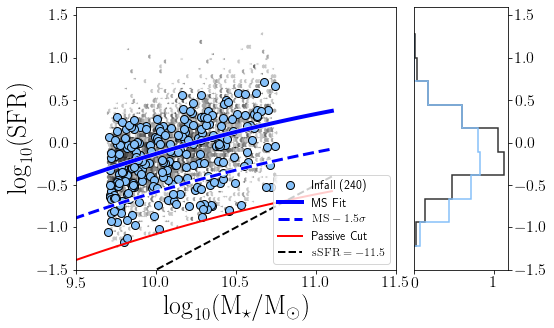

In [18]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5 --cutN --nsersic 2.5 --maxmass 10.75

mmatch = True
if mmatch:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-Nsersic2-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-Nsersic2-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=True,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-Nsersic2-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-Nsersic2-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)
else:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-Nsersic2-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-Nsersic2-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-Nsersic2-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-Nsersic2-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)
    

In [14]:
b.fit_gsw_ms()

STD of pruned data = 0.16
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.51
Best-fit inter = -5.22
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.51+/-0.05
Best-fit inter = -5.22+/-0.52
fitting MS with parabola
MS fit =  Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
            c0                 c1                   c2         
    ------------------ ------------------ ---------------------
    -9.949993606594951 1.4674771950047136 -0.048721320256152216
STD of pruned data = 0.16
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.51
Best-fit inter = -5.22
Width of the MS = 0.17 (unclipped data)
###################################
##

Text(0.5, 1.0, 'MS Fit For Diff Morphology Indicators')

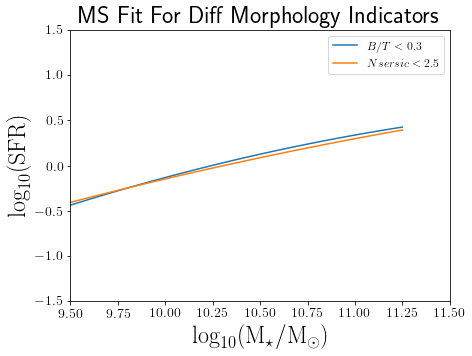

In [31]:
xline = np.linspace(9,11.25,100)
yline = get_MS(xline,BTcut=True)

plt.figure()
plt.plot(xline,yline,label=r'$B/T < 0.3$')

c = [-9.949993606594951, 1.4674771950047136, -0.048721320256152216]
yline_nsersic = c[0]+c[1]*xline + c[2]*xline**2
plt.plot(xline,yline_nsersic,label=r'$Nsersic < 2.5$')
plt.axis([9.5,11.5,-1.5,1.5])
plt.legend()
plt.ylabel(r'$\rm \log_{10}(SFR)$')
plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$')
plt.title('MS Fit For Diff Morphology Indicators')

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag

Field: median = -0.0042-0.0046+0.0045 (bootstrap)
Field: mean, std, std_err = -0.0078,0.3065,0.0030 


Core: median = -0.1318-0.0390+0.0897 (bootstrap)
Core: mean, std, std_err = -0.1114,0.3385,0.0351 


Infall: median = -0.0876-0.0132+0.0321 (bootstrap)
Infall: mean, std, std_err = -0.1135,0.3604,0.0228 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.1967616539703439, pvalue=0.0015910337935094417)
Anderson_ksampResult(statistic=6.499030510963211, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001047210487649759)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.1684198250728863, pvalue=1.9395168098047483e-06)
Anderson_ksampResult(statistic=17.31334071951574, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

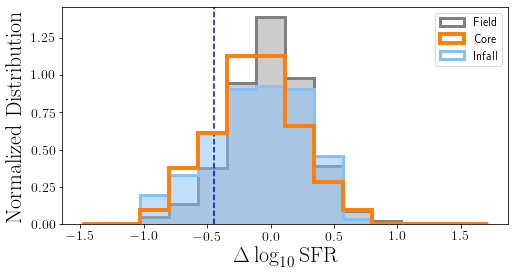

In [21]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutN --nsersic 2.5 --minmass 9.7  --ellip 0.75 --minssfr -11.5
mmatch=True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-Nsersic2-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-Nsersic2-e0p75-mmatch.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)
else:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-Nsersic2-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-Nsersic2-e0p75.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=False)
print('number of core galaxies = ',np.sum(b.lcs.membflag & b.lcs_mass_sfr_flag))
print('number of infall galaxies = ',np.sum(b.lcs.infallflag & b.lcs_mass_sfr_flag))

In [20]:
print(np.sum(b.lcs.membflag & b.lcs_mass_sfr_flag))
print(np.sum(b.lcs.infallflag & b.lcs_mass_sfr_flag))

89
240
